# 1.pre processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
import sklearn.preprocessing as preprocessing
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 300)
pd.options.display.float_format='{:40,.4f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [3]:
london1=pd.read_csv('public.csv')
london2=pd.read_csv('personal.csv')
london3=pd.read_csv('other.csv')

In [6]:
london1.info()
london2.info()
london3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 19 columns):
geography                      964 non-null object
geography code                 964 non-null object
population_commuting           964 non-null int64
all_public transport           964 non-null int64
all_public transport%          964 non-null float64
youger(16-34)%                 964 non-null float64
higher or equal to level 4%    964 non-null float64
Managers%                      964 non-null float64
Professional%                  964 non-null float64
Associate professional%        964 non-null float64
Administrative%                964 non-null float64
Skilled trades occupations%    964 non-null float64
Caring%                        964 non-null float64
Sales%                         964 non-null float64
Process%                       964 non-null float64
Elementary%                    964 non-null float64
distance less than 10km%       964 non-null float64
full time%       

In [11]:
#london1.describe()
london2.describe()
#london3.describe()

population_commuting  \
count                                 964.0000   
mean                                3,680.7842   
std                                   802.7909   
min                                 1,947.0000   
25%                                 3,135.0000   
50%                                 3,594.0000   
75%                                 4,099.7500   
max                                 7,721.0000   

                        all_personal transport  \
count                                 964.0000   
mean                                1,090.3133   
std                                   575.1143   
min                                   112.0000   
25%                                   572.2500   
50%                                 1,047.0000   
75%                                 1,540.0000   
max                                 3,096.0000   

                           personal transport%  \
count                                 964.0000   
mean                                    0.3031   
std                                     0.1550   
min                                     0.0331   
25%                                     0.1552   
50%                                     0.2939   
75%                                     0.4380   
max                                     0.6913   

                                     Managers%  \
count                                 964.0000   
mean                                    0.1342   
std                                     0.0598   
min                                     0.0516   
25%                                     0.0975   
50%                                     0.1181   
75%                                     0.1493   
max                                     0.4609   

                                 Professional%  \
count                                 964.0000   
mean                                    0.2183   
std                                     0.0729   
min                                     0.0728   
25%                                     0.1580   
50%                                     0.2088   
75%                                     0.2685   
max                                     0.4852   

                       Associate professional%  \
count                                 964.0000   
mean                                    0.1269   
std                                     0.0394   
min                                     0.0532   
25%                                     0.0985   
50%                                     0.1187   
75%                                     0.1473   
max                                     0.2720   

                                    Unnamed: 8  \
count                                 964.0000   
mean                                    0.0931   
std                                     0.0330   
min                                     0.0148   
25%                                     0.0667   
50%                                     0.0893   
75%                                     0.1210   
max                                     0.1724   

                                      Skilled%  \
count                                 964.0000   
mean                                    0.1236   
std                                     0.0367   
min                                     0.0164   
25%                                     0.0993   
50%                                     0.1263   
75%                                     0.1505   
max                                     0.3082   

                                       Caring%  \
count                                 964.0000   
mean                                    0.0771   
std                                     0.0241   
min                                     0.0098   
25%                                     0.0608   
50%                                     0.0781   
75%                                     0.0946   
max               

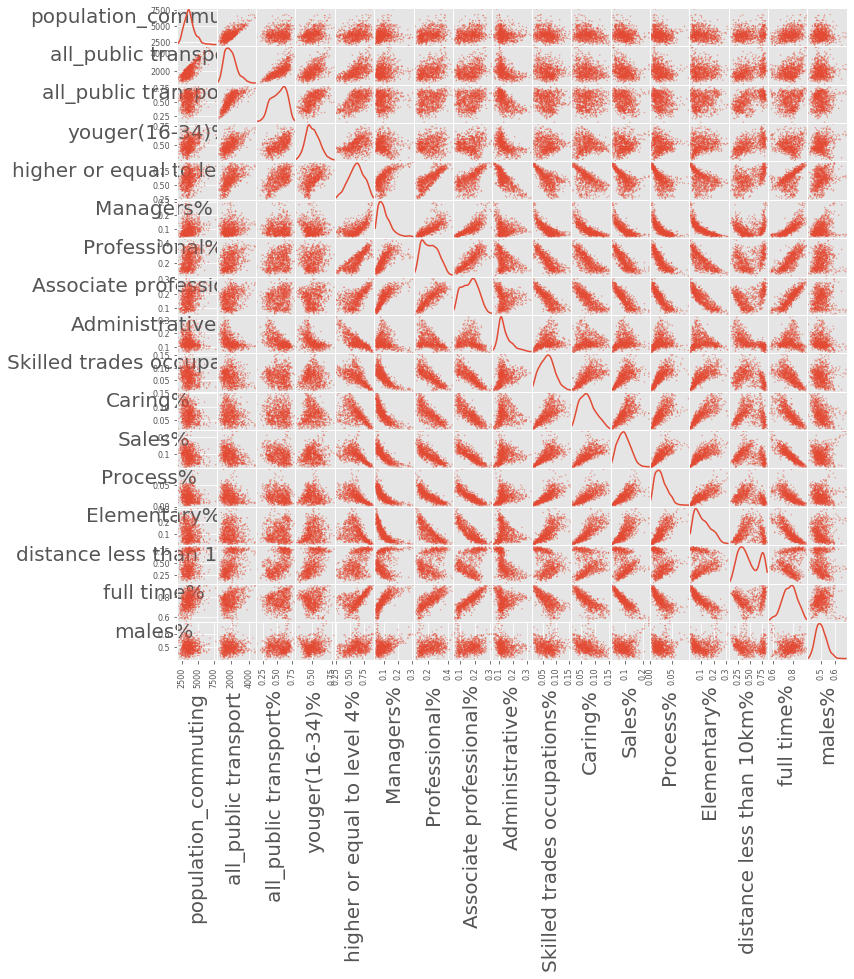

In [67]:
scatter_matrix=pd.plotting.scatter_matrix(
     frame=london1,
     figsize=[12,12],
     marker='.',
     s=8,
      diagonal='kde')

for a in scatter_matrix.ravel():
    a.set_xlabel(a.get_xlabel(),fontsize=20,rotation=90)
    a.set_ylabel(a.get_ylabel(),fontsize=20,rotation=0)

In [6]:
london1.corr()

population_commuting  \
population_commuting                                          1.0000   
all_public transport                                          0.7567   
all_public transport%                                         0.1854   
youger(16-34)%                                                0.3302   
higher or equal to level 4%                                   0.2993   
Managers%                                                     0.1217   
Professional%                                                 0.2796   
Associate professional%                                       0.2662   
Administrative%                                              -0.1358   
Skilled trades occupations%                                  -0.1815   
Caring%                                                      -0.2316   
Sales%                                                       -0.2415   
Process%                                                     -0.1869   
Elementary%                                                  -0.1778   
distance less than 10km%                                      0.1441   
full time%                                                    0.3528   
males%                                                       -0.0167   

                                                all_public transport  \
population_commuting                                          0.7567   
all_public transport                                          1.0000   
all_public transport%                                         0.7690   
youger(16-34)%                                                0.5837   
higher or equal to level 4%                                   0.5719   
Managers%                                                     0.1259   
Professional%                                                 0.3736   
Associate professional%                                       0.3062   
Administrative%                                              -0.4565   
Skilled trades occupations%                                  -0.1956   
Caring%                                                      -0.1909   
Sales%                                                       -0.3223   
Process%                                                     -0.2782   
Elementary%                                                  -0.0407   
distance less than 10km%                                      0.4544   
full time%                                                    0.3204   
males%                                                        0.0170   

                                               all_public transport%  \
population_commuting                                          0.1854   
all_public transport                                          0.7690   
all_public transport%                                         1.0000   
youger(16-34)%                                                0.5703   
higher or equal to level 4%                                   0.5776   
Managers%                                                     0.0520   
Professional%                                                 0.2696   
Associate professional%                                       0.1779   
Administrative%                                              -0.5766   
Skilled trades occupations%                                  -0.0979   
Caring%                                                      -0.0380   
Sales%                                                       -0.2262   
Process%                                                     -0.2175   
Elementary%                                                   0.1476   
distance less than 10km%                                      0.5597   
full time%                                                    0.1048   
males%                                                        0.0553   

                                                      youger(16-34)%  \
population_commuting                                          0.3302   
all_public tr

In [7]:

from sklearn.cluster import DBSCAN

# 2.subset

<mark style=background-color:yellow>
1.youger</mark>

In [819]:
#Extract the subset
london1_allpublic_age=london1[['all_public transport%','youger(16-34)%']]
london1_allpublic_age

all_public transport%  \
0                                     0.4125   
1                                     0.4645   
2                                     0.3617   
3                                     0.4245   
4                                     0.4532   
5                                     0.4410   
6                                     0.4734   
7                                     0.4798   
8                                     0.4884   
9                                     0.4899   
10                                    0.4577   
11                                    0.4797   
12                                    0.4817   
13                                    0.6949   
14                                    0.5835   
15                                    0.4937   
16                                    0.4579   
17                                    0.5320   
18                                    0.4525   
19                                    0.6220   
20                                    0.5325   
21                                    0.4353   
22                                    0.4004   
23                                    0.4128   
24                                    0.3646   
25                                    0.3743   
26                                    0.4103   
27                                    0.4048   
28                                    0.3228   
29                                    0.4926   
30                                    0.3941   
31                                    0.4469   
32                                    0.4220   
33                                    0.5372   
34                                    0.3981   
35                                    0.3577   
36                                    0.5009   
37                                    0.4044   
38                                    0.4024   
39                                    0.4558   
40                                    0.5522   
41                                    0.5255   
42                                    0.4931   
43                                    0.5272   
44                                    0.6177   
45                                    0.5277   
46                                    0.4267   
47                                    0.5283   
48                                    0.5193   
49                                    0.5070   
50                                    0.6234   
51                                    0.5514   
52                                    0.4770   
53                                    0.5262   
54                                    0.4553   
55                                    0.4699   
56                                    0.5391   
57                                    0.5007   
58                                    0.5042   
59                                    0.6489   
60                                    0.5568   
61                                    0.5698   
62                                    0.6126   
63                                    0.5613   
64                                    0.5520   
65                                    0.4263   
66                                    0.4512   
67                                    0.3452   
68                                    0.3444   
69                                    0.3202   
70                                    0.4139   
71                                    0.3581   
72                                    0.3319   
73                                    0.3591   
74                                    0.3873   
75                                    0.3566   
76                                    0.4253   
77                                    0.3983   
78                                    0.3521   
79                                    0.3688   
80                                    0.3371   
81                                    0.3472   
82                                    0

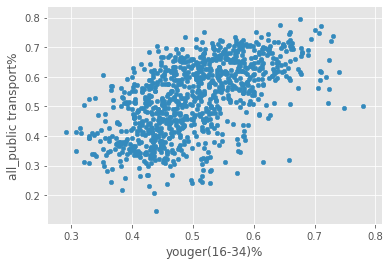

In [820]:
#Do a scatter plot of the data
london1_allpublic_age.plot.scatter(x='youger(16-34)%',y='all_public transport%')


<mark style=background-color:yellow>
2.qualification</mark>

In [10]:
#Extract the subset
london1_allpublic_qualification=london1[['all_public transport%','higher or equal to level 4%']]
london1_allpublic_qualification

all_public transport%  \
0                                     0.4125   
1                                     0.4645   
2                                     0.3617   
3                                     0.4245   
4                                     0.4532   
5                                     0.4410   
6                                     0.4734   
7                                     0.4798   
8                                     0.4884   
9                                     0.4899   
10                                    0.4577   
11                                    0.4797   
12                                    0.4817   
13                                    0.6949   
14                                    0.5835   
15                                    0.4937   
16                                    0.4579   
17                                    0.5320   
18                                    0.4525   
19                                    0.6220   
20                                    0.5325   
21                                    0.4353   
22                                    0.4004   
23                                    0.4128   
24                                    0.3646   
25                                    0.3743   
26                                    0.4103   
27                                    0.4048   
28                                    0.3228   
29                                    0.4926   
30                                    0.3941   
31                                    0.4469   
32                                    0.4220   
33                                    0.5372   
34                                    0.3981   
35                                    0.3577   
36                                    0.5009   
37                                    0.4044   
38                                    0.4024   
39                                    0.4558   
40                                    0.5522   
41                                    0.5255   
42                                    0.4931   
43                                    0.5272   
44                                    0.6177   
45                                    0.5277   
46                                    0.4267   
47                                    0.5283   
48                                    0.5193   
49                                    0.5070   
50                                    0.6234   
51                                    0.5514   
52                                    0.4770   
53                                    0.5262   
54                                    0.4553   
55                                    0.4699   
56                                    0.5391   
57                                    0.5007   
58                                    0.5042   
59                                    0.6489   
60                                    0.5568   
61                                    0.5698   
62                                    0.6126   
63                                    0.5613   
64                                    0.5520   
65                                    0.4263   
66                                    0.4512   
67                                    0.3452   
68                                    0.3444   
69                                    0.3202   
70                                    0.4139   
71                                    0.3581   
72                                    0.3319   
73                                    0.3591   
74                                    0.3873   
75                                    0.3566   
76                                    0.4253   
77                                    0.3983   
78                                    0.3521   
79                                    0.3688   
80                                    0.3371   
81                                    0.3472   
82                                    0

# 3.take into model


<mark style=background-color:yellow>
1.younger</mark>

In [826]:
#Set dbscan model and set parameters
dbscan1=DBSCAN(eps=0.1,min_samples=300)#eps 是最小距离 minsample是group size

In [827]:
#Fit data for clustering
dbscan1.fit(london1_allpublic_age)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=300, n_jobs=None, p=None)

In [828]:
#Extract the clustered type tag, which is an array
dbscan_labels1=dbscan1.labels_
dbscan_labels1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

<mark style=background-color:yellow>
2.qualification</mark>

In [15]:
#Set dbscan model and set parameters
dbscan2=DBSCAN(eps=0.1,min_samples=240)#eps 是最小距离 minsample是group size

In [16]:
#Fit data for clustering
dbscan2.fit(london1_allpublic_qualification)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=240, n_jobs=None, p=None)

In [17]:
#Extract the clustered type tag, which is an array
dbscan_labels2=dbscan2.labels_
dbscan_labels2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
        0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,
        0, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,  0,
        0, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,
       -1,  0, -1, -1, -1

# 4.assessment and visulisation

In [4]:
from sklearn import metrics

<mark style=background-color:yellow>
1.younger</mark>

In [829]:
#Contour coefficients were used to evaluate the clustering effect. The parameters are the clustering data and the classification label after clustering
metrics.silhouette_score(london1_allpublic_age,dbscan_labels1)

0.312180076178171

In [830]:
#Assign is the tool in panda for adding new columns to dataframe
london1_allpublic_age=london1_allpublic_age.assign(label=dbscan_labels1)

In [831]:
#Let's see how many categories there are and how many of them there are in each category
london1_allpublic_age.label.value_counts()
#london1_allpublic_age.label.count()

 0    852
-1    112
Name: label, dtype: int64

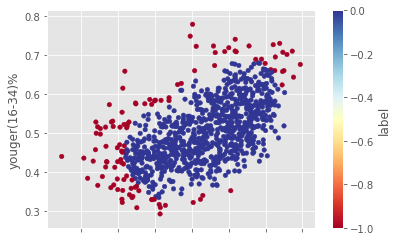

In [22]:
#C is the legend what is the classification
london1_allpublic_age.plot.scatter(x='all_public transport%',y='youger(16-34)%',c='label',cmap='RdYlBu')


<mark style=background-color:yellow>
2.qualification</mark>

In [23]:
#Contour coefficients were used to evaluate the clustering effect. The parameters are the clustering data and the classification label after clustering
metrics.silhouette_score(london1_allpublic_qualification,dbscan_labels2)

0.25458768730218667

In [24]:
#assign是panda里的工具 用于给dataframe加新的列
london1_allpublic_qualification=london1_allpublic_qualification.assign(label=dbscan_labels2)

In [25]:
#看看分成了多少类 每类有多少个
london1_allpublic_qualification.label.value_counts()
#london1_allpublic_age.label.count()

-1    516
 0    448
Name: label, dtype: int64

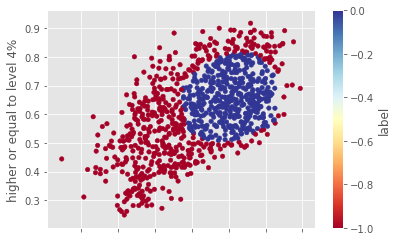

In [26]:
#c是图例 即按什么分类
london1_allpublic_qualification.plot.scatter(x='all_public transport%',y='higher or equal to level 4%',c='label',cmap='RdYlBu')


In [27]:
london1_allpublic_qualification

all_public transport%  \
0                                     0.4125   
1                                     0.4645   
2                                     0.3617   
3                                     0.4245   
4                                     0.4532   
5                                     0.4410   
6                                     0.4734   
7                                     0.4798   
8                                     0.4884   
9                                     0.4899   
10                                    0.4577   
11                                    0.4797   
12                                    0.4817   
13                                    0.6949   
14                                    0.5835   
15                                    0.4937   
16                                    0.4579   
17                                    0.5320   
18                                    0.4525   
19                                    0.6220   
20                                    0.5325   
21                                    0.4353   
22                                    0.4004   
23                                    0.4128   
24                                    0.3646   
25                                    0.3743   
26                                    0.4103   
27                                    0.4048   
28                                    0.3228   
29                                    0.4926   
30                                    0.3941   
31                                    0.4469   
32                                    0.4220   
33                                    0.5372   
34                                    0.3981   
35                                    0.3577   
36                                    0.5009   
37                                    0.4044   
38                                    0.4024   
39                                    0.4558   
40                                    0.5522   
41                                    0.5255   
42                                    0.4931   
43                                    0.5272   
44                                    0.6177   
45                                    0.5277   
46                                    0.4267   
47                                    0.5283   
48                                    0.5193   
49                                    0.5070   
50                                    0.6234   
51                                    0.5514   
52                                    0.4770   
53                                    0.5262   
54                                    0.4553   
55                                    0.4699   
56                                    0.5391   
57                                    0.5007   
58                                    0.5042   
59                                    0.6489   
60                                    0.5568   
61                                    0.5698   
62                                    0.6126   
63                                    0.5613   
64                                    0.5520   
65                                    0.4263   
66                                    0.4512   
67                                    0.3452   
68                                    0.3444   
69                                    0.3202   
70                                    0.4139   
71                                    0.3581   
72                                    0.3319   
73                                    0.3591   
74                                    0.3873   
75                                    0.3566   
76                                    0.4253   
77                                    0.3983   
78                                    0.3521   
79                                    0.3688   
80                                    0.3371   
81                                    0.3472   
82                                    0

<mark style=background-color:orange>
public part###############################
    ###############################################</mark>

In [59]:
#提取子集
london1_allpublic_manager=london1[['all_public transport%','distance less than 10km%']]
#london1_allpublic_manager

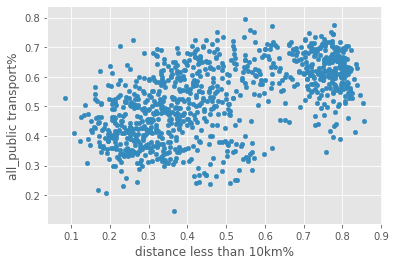

In [61]:
#做数据散点图 观察
london1_allpublic_manager.plot.scatter(x='distance less than 10km%',y='all_public transport%')


In [62]:
#将数据standalize，由于两个变量数值相差过大

scaled3=preprocessing.scale(london1_allpublic_manager)
#scaled3

In [63]:
#设定dbscan模型，设置参数
dbscan_3=DBSCAN(eps=0.4,min_samples=50)#eps 是最小距离 minsample是group size

In [64]:
#fit数据，进行聚类
dbscan_3.fit(scaled3)


DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [65]:
#提取聚类后的类型标签，是个array
dbscan_labels_3=dbscan_3.labels_
dbscan_labels_3

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0, -1,  0, -1,  1,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  0,  1,  0,  0, -1,  1,  1,  1,  1,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0

In [66]:
#轮廓系数评估聚类效果。参数是进行聚类的数据，以及聚类后的分类标签
metrics.silhouette_score(scaled3,dbscan_labels_3)

0.3770823468567721

In [67]:
#assign是panda里的工具 用于给dataframe加新的列
london1_allpublic_manager=london1_allpublic_manager.assign(label=dbscan_labels_3,geography=london1[['geography']],geographycode=london1[['geography_code']])
london1_allpublic_manager.to_csv("public_distance_less_than_10km%_cluster.csv",index=False,sep=',')

In [68]:
london1_allpublic_manager

all_public transport%  \
0                                     0.4125   
1                                     0.4645   
2                                     0.3617   
3                                     0.4245   
4                                     0.4532   
5                                     0.4410   
6                                     0.4734   
7                                     0.4798   
8                                     0.4884   
9                                     0.4899   
10                                    0.4577   
11                                    0.4797   
12                                    0.4817   
13                                    0.6949   
14                                    0.5835   
15                                    0.4937   
16                                    0.4579   
17                                    0.5320   
18                                    0.4525   
19                                    0.6220   
20                                    0.5325   
21                                    0.4353   
22                                    0.4004   
23                                    0.4128   
24                                    0.3646   
25                                    0.3743   
26                                    0.4103   
27                                    0.4048   
28                                    0.3228   
29                                    0.4926   
30                                    0.3941   
31                                    0.4469   
32                                    0.4220   
33                                    0.5372   
34                                    0.3981   
35                                    0.3577   
36                                    0.5009   
37                                    0.4044   
38                                    0.4024   
39                                    0.4558   
40                                    0.5522   
41                                    0.5255   
42                                    0.4931   
43                                    0.5272   
44                                    0.6177   
45                                    0.5277   
46                                    0.4267   
47                                    0.5283   
48                                    0.5193   
49                                    0.5070   
50                                    0.6234   
51                                    0.5514   
52                                    0.4770   
53                                    0.5262   
54                                    0.4553   
55                                    0.4699   
56                                    0.5391   
57                                    0.5007   
58                                    0.5042   
59                                    0.6489   
60                                    0.5568   
61                                    0.5698   
62                                    0.6126   
63                                    0.5613   
64                                    0.5520   
65                                    0.4263   
66                                    0.4512   
67                                    0.3452   
68                                    0.3444   
69                                    0.3202   
70                                    0.4139   
71                                    0.3581   
72                                    0.3319   
73                                    0.3591   
74                                    0.3873   
75                                    0.3566   
76                                    0.4253   
77                                    0.3983   
78                                    0.3521   
79                                    0.3688   
80                                    0.3371   
81                                    0.3472   
82                                    0

In [70]:
#看看分成了多少类 每类有多少个
london1_allpublic_manager.label.value_counts()
#london1_allpublic_age.label.count()

 0    536
 1    291
-1    137
Name: label, dtype: int64

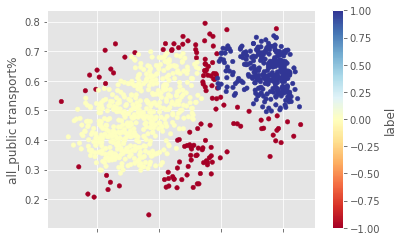

In [71]:
#c是图例 即按什么分类
london1_allpublic_manager.plot.scatter(x='distance less than 10km%',y='all_public transport%',c='label',cmap='RdYlBu')


<mark style=background-color:yellow>
kmean try it. but disposal###############################
    ###############################################kmean</mark>

In [1]:
#提取子集
london1_allpublic_young=london1[['all_public transport%','distance less than 10km%']]
#london1_allpublic_manager

NameError: name 'london1' is not defined

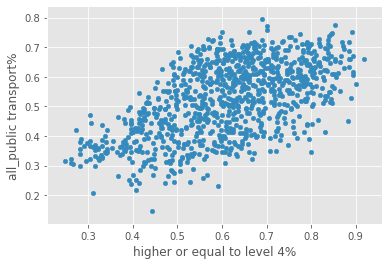

In [2297]:
#做数据散点图 观察
london1_allpublic_young.plot.scatter(x='higher or equal to level 4%',y='all_public transport%')


In [2298]:
#将数据standalize，由于两个变量数值相差过大

scaled4=preprocessing.scale(london1_allpublic_young)
#scaled4

In [2299]:
 #建立kmean模型
kmeans_method=KMeans(n_clusters=2,random_state=1)  
kmeans_method.fit(scaled4)   #套入数据，进行kmean聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

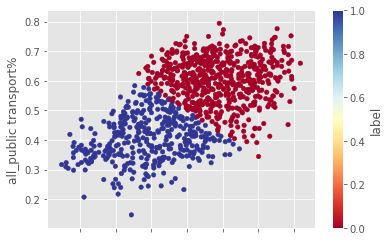

In [2300]:
london1_allpublic_young=london1_allpublic_young.assign(label=kmeans_method.labels_)   #添加新列类型
london1_allpublic_young.plot.scatter(x='higher or equal to level 4%',y='all_public transport%',c='label',cmap='RdYlBu')   #可视化

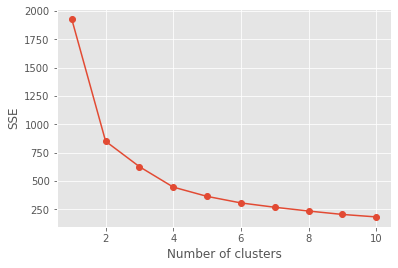

In [2288]:
list_SSE=[]
min_k=1
max_k=10
range_k=range(min_k,max_k+1)
for i in range_k:   #for loop从一个聚类到10个聚类 进行sse的计算
    km=KMeans(n_clusters=i,random_state=0,init='random',n_init=10,max_iter=300,tol=1e-04)  #设定模型和参数
    km.fit(scaled4)   #进行聚类
    list_SSE.append(km.inertia_)   #提取聚类后模型的inertia_ 即sse分数
    

#作图 发现3个聚类数最好    
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

<mark style=background-color:orange>
personal part###############################
    ###############################################</mark>

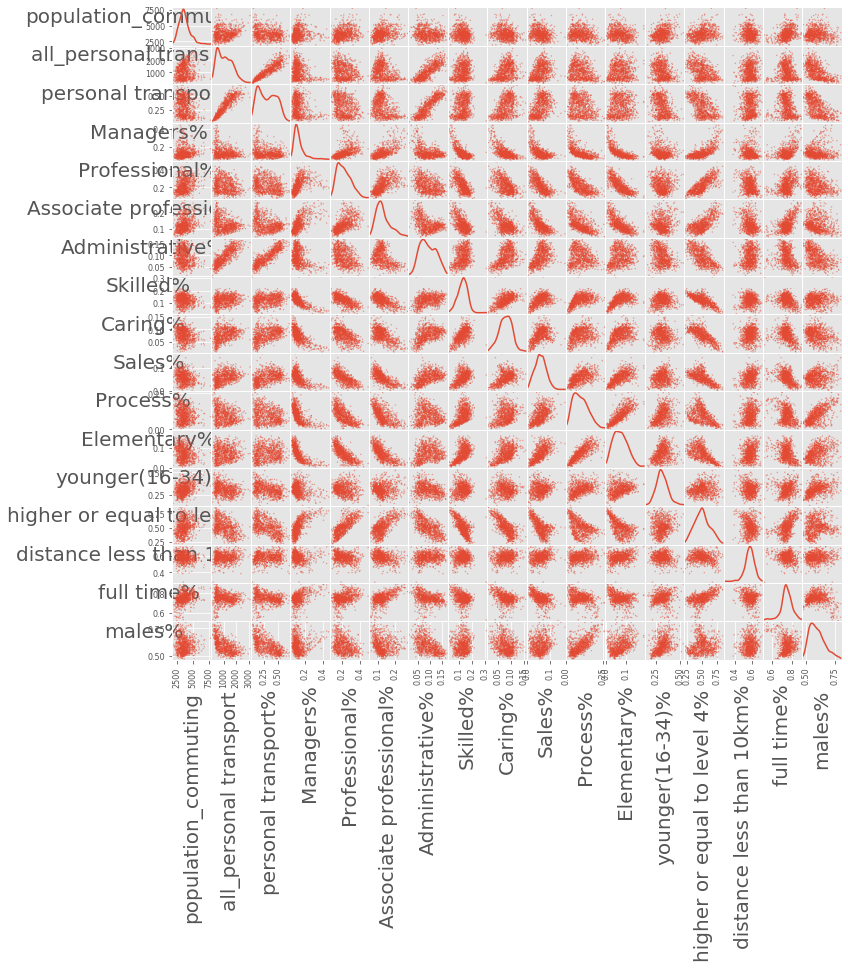

In [17]:
scatter_matrix=pd.plotting.scatter_matrix(
     frame=london2,
     figsize=[12,12],
     marker='.',
     s=8,
      diagonal='kde')

for a in scatter_matrix.ravel():
    a.set_xlabel(a.get_xlabel(),fontsize=20,rotation=90)
    a.set_ylabel(a.get_ylabel(),fontsize=20,rotation=0)

In [16]:
london2.corr()

population_commuting  \
population_commuting                                          1.0000   
all_personal transport                                        0.1599   
personal transport%                                          -0.2031   
Managers%                                                     0.0680   
Professional%                                                 0.2472   
Associate professional%                                       0.2612   
Administrative%                                              -0.1506   
Skilled%                                                     -0.1262   
Caring%                                                      -0.1972   
Sales%                                                       -0.2147   
Process%                                                     -0.1496   
Elementary%                                                  -0.1712   
younger(16-34)%                                               0.2996   
higher or equal to level 4%                                   0.2623   
distance less than 10km%                                     -0.1080   
full time%                                                    0.3637   
males%                                                       -0.0438   

                                              all_personal transport  \
population_commuting                                          0.1599   
all_personal transport                                        1.0000   
personal transport%                                           0.9120   
Managers%                                                    -0.2430   
Professional%                                                -0.2306   
Associate professional%                                      -0.2468   
Administrative%                                               0.8183   
Skilled%                                                      0.1847   
Caring%                                                       0.3597   
Sales%                                                        0.3601   
Process%                                                     -0.2471   
Elementary%                                                   0.0655   
younger(16-34)%                                              -0.2719   
higher or equal to level 4%                                  -0.4680   
distance less than 10km%                                      0.0686   
full time%                                                   -0.0931   
males%                                                       -0.5862   

                                                 personal transport%  \
population_commuting                                         -0.2031   
all_personal transport                                        0.9120   
personal transport%                                           1.0000   
Managers%                                                    -0.2590   
Professional%                                                -0.3004   
Associate professional%                                      -0.3263   
Administrative%                                               0.8800   
Skilled%                                                      0.2224   
Caring%                                                       0.4418   
Sales%                                                        0.4189   
Process%                                                     -0.2246   
Elementary%                                                   0.1047   
younger(16-34)%                                              -0.3860   
higher or equal to level 4%                                  -0.5644   
distance less than 10km%                                      0.0676   
full time%                                                   -0.2065   
males%                                                       -0.6059   

                                                           Managers%  \
population_commuting                                          0.0680   
all_personal 

In [114]:
#提取子集
london2_personal_wowo=london2[['personal transport%','males%']]
#london1_allpublic_manager

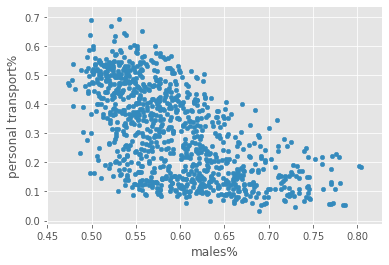

In [115]:
#做数据散点图 观察
london2_personal_wowo.plot.scatter(x='males%',y='personal transport%')


In [116]:
#将数据standalize，由于两个变量数值相差过大

scaled4=preprocessing.scale(london2_personal_wowo)
#scaled3

In [117]:
#设定dbscan模型，设置参数
dbscan_4=DBSCAN(eps=0.3,min_samples=30)#eps 是最小距离 minsample是group size

In [118]:
#fit数据，进行聚类
dbscan_4.fit(scaled4)


DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=30, n_jobs=None, p=None)

In [119]:
#提取聚类后的类型标签，是个array
dbscan_labels_4=dbscan_4.labels_
dbscan_labels_4

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1, -1,  0,  1,
       -1,  0,  1,  1,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,
       -1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0, -1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [120]:
#轮廓系数评估聚类效果。参数是进行聚类的数据，以及聚类后的分类标签
metrics.silhouette_score(scaled4,dbscan_labels_4)

0.35114367578416644

In [122]:
#assign是panda里的工具 用于给dataframe加新的列
london2_personal_wowo=london2_personal_wowo.assign(label=dbscan_labels_4,geography=london2[['geography']])
london2_personal_wowo.to_csv("personal_males.csv",index=False,sep=',')

In [123]:
london2_personal_wowo

personal transport%  \
0                                     0.4628   
1                                     0.4207   
2                                     0.4940   
3                                     0.4461   
4                                     0.4169   
5                                     0.4301   
6                                     0.4148   
7                                     0.3988   
8                                     0.3807   
9                                     0.3957   
10                                    0.4146   
11                                    0.3795   
12                                    0.3775   
13                                    0.2003   
14                                    0.2949   
15                                    0.3940   
16                                    0.4058   
17                                    0.3389   
18                                    0.4085   
19                                    0.2547   
20                                    0.3532   
21                                    0.4325   
22                                    0.4376   
23                                    0.4722   
24                                    0.5318   
25                                    0.4826   
26                                    0.4826   
27                                    0.4732   
28                                    0.5777   
29                                    0.4049   
30                                    0.4978   
31                                    0.4469   
32                                    0.4535   
33                                    0.3565   
34                                    0.4999   
35                                    0.5287   
36                                    0.3843   
37                                    0.4883   
38                                    0.4422   
39                                    0.4084   
40                                    0.3076   
41                                    0.3658   
42                                    0.3946   
43                                    0.3453   
44                                    0.2647   
45                                    0.3540   
46                                    0.4720   
47                                    0.3530   
48                                    0.3421   
49                                    0.3733   
50                                    0.2544   
51                                    0.3196   
52                                    0.3930   
53                                    0.3236   
54                                    0.4206   
55                                    0.3655   
56                                    0.3344   
57                                    0.3542   
58                                    0.3175   
59                                    0.2449   
60                                    0.2815   
61                                    0.3087   
62                                    0.2577   
63                                    0.3556   
64                                    0.3475   
65                                    0.4478   
66                                    0.4173   
67                                    0.5214   
68                                    0.5334   
69                                    0.5325   
70                                    0.4446   
71                                    0.5275   
72                                    0.5243   
73                                    0.5085   
74                                    0.4827   
75                                    0.5280   
76                                    0.4275   
77                                    0.4791   
78                                    0.5002   
79                                    0.5156   
80                                    0.5306   
81                                    0.5236   
82                                    0.5

In [124]:
#看看分成了多少类 每类有多少个
london2_personal_wowo.label.value_counts()
#london1_allpublic_age.label.count()

 0    468
 1    307
-1    189
Name: label, dtype: int64

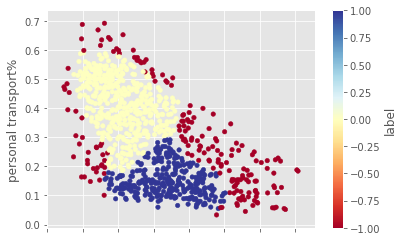

In [126]:
#c是图例 即按什么分类
london2_personal_wowo.plot.scatter(x='males%',y='personal transport%',c='label',cmap='RdYlBu')


<mark style=background-color:orange>
other part###############################
    ###############################################</mark>

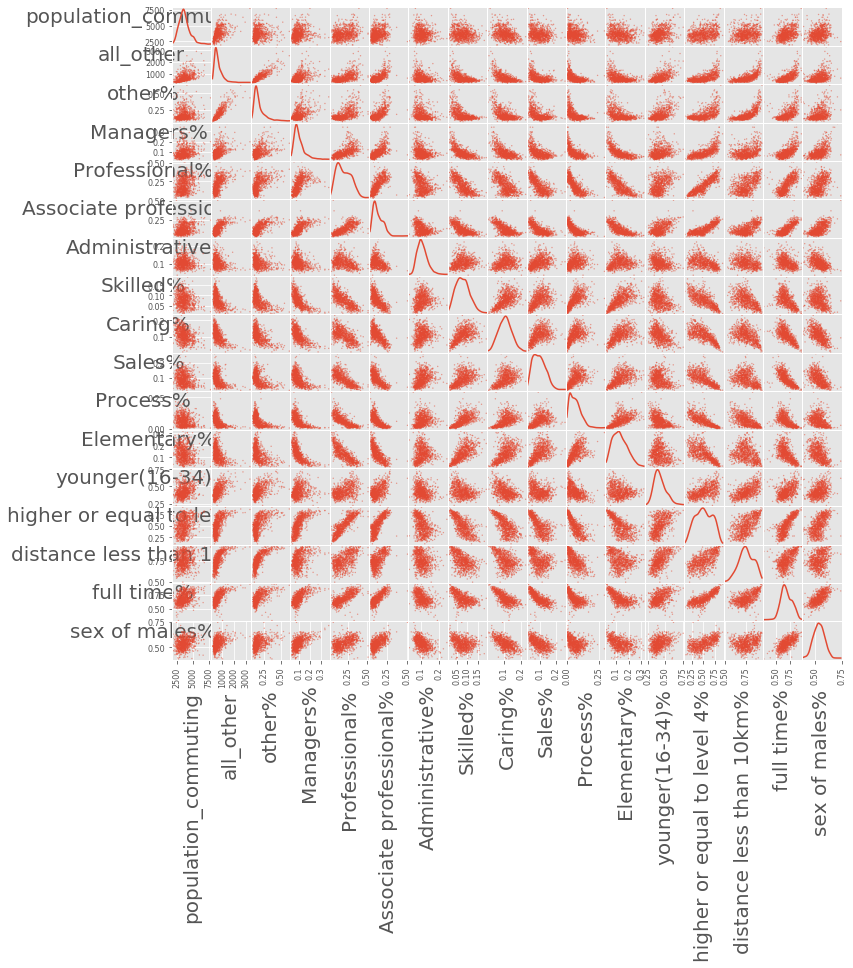

In [984]:
scatter_matrix=pd.plotting.scatter_matrix(
     frame=london3,
     figsize=[12,12],
     marker='.',
     s=8,
      diagonal='kde')

for a in scatter_matrix.ravel():
    a.set_xlabel(a.get_xlabel(),fontsize=20,rotation=90)
    a.set_ylabel(a.get_ylabel(),fontsize=20,rotation=0)

In [985]:
london3.corr()

population_commuting  \
population_commuting                                          1.0000   
all_other                                                     0.5187   
other%                                                        0.1104   
Managers%                                                     0.1729   
Professional%                                                 0.2657   
Associate professional%                                       0.2583   
Administrative%                                              -0.0871   
Skilled%                                                     -0.1766   
Caring%                                                      -0.3324   
Sales%                                                       -0.1983   
Process%                                                     -0.1917   
Elementary%                                                  -0.2036   
younger(16-34)%                                               0.3051   
higher or equal to level 4%                                   0.3068   
distance less than 10km%                                      0.1616   
full time%                                                    0.3815   
sex of males%                                                 0.2359   

                                                           all_other  \
population_commuting                                          0.5187   
all_other                                                     1.0000   
other%                                                        0.8812   
Managers%                                                     0.4661   
Professional%                                                 0.5801   
Associate professional%                                       0.6715   
Administrative%                                              -0.2653   
Skilled%                                                     -0.5387   
Caring%                                                      -0.6190   
Sales%                                                       -0.4819   
Process%                                                     -0.5238   
Elementary%                                                  -0.4702   
younger(16-34)%                                               0.5772   
higher or equal to level 4%                                   0.6127   
distance less than 10km%                                      0.6793   
full time%                                                    0.6540   
sex of males%                                                 0.3887   

                                                              other%  \
population_commuting                                          0.1104   
all_other                                                     0.8812   
other%                                                        1.0000   
Managers%                                                     0.4668   
Professional%                                                 0.5638   
Associate professional%                                       0.6747   
Administrative%                                              -0.2564   
Skilled%                                                     -0.5597   
Caring%                                                      -0.5756   
Sales%                                                       -0.4797   
Process%                                                     -0.5443   
Elementary%                                                  -0.4562   
younger(16-34)%                                               0.5378   
higher or equal to level 4%                                   0.5840   
distance less than 10km%                                      0.7392   
full time%                                                    0.5812   
sex of males%                                                 0.3492   

                                                           Managers%  \
population_commuting                                          0.1729   
all_other    

In [155]:
#提取子集
london3_personal_wowo=london3[['other%','full time%']]
#london1_allpublic_manager

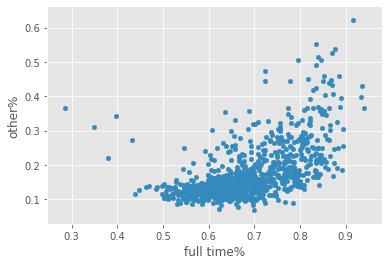

In [156]:
#做数据散点图 观察
london3_personal_wowo.plot.scatter(x='full time%',y='other%')


In [157]:
#将数据standalize，由于两个变量数值相差过大

scaled5=preprocessing.scale(london3_personal_wowo)
#scaled3

In [158]:
#设定dbscan模型，设置参数
dbscan_5=DBSCAN(eps=0.3,min_samples=20)#eps 是最小距离 minsample是group size

In [159]:
#fit数据，进行聚类
dbscan_5.fit(scaled5)


DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [160]:
#提取聚类后的类型标签，是个array
dbscan_labels_5=dbscan_5.labels_
dbscan_labels_5

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,
       -1,  0,  1,  0,  0, -1,  0,  2, -1,  0,  0, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [161]:
#轮廓系数评估聚类效果。参数是进行聚类的数据，以及聚类后的分类标签
metrics.silhouette_score(scaled5,dbscan_labels_5)

0.310990819124143

In [162]:
#assign是panda里的工具 用于给dataframe加新的列
london3_personal_wowo=london3_personal_wowo.assign(label=dbscan_labels_5,geography=london2[['geography']])
london3_personal_wowo.to_csv("other_fulltime.csv",index=False,sep=',')

In [163]:
london3_personal_wowo

other%  \
0                                     0.1247   
1                                     0.1148   
2                                     0.1442   
3                                     0.1294   
4                                     0.1299   
5                                     0.1288   
6                                     0.1118   
7                                     0.1215   
8                                     0.1309   
9                                     0.1144   
10                                    0.1278   
11                                    0.1408   
12                                    0.1408   
13                                    0.1047   
14                                    0.1217   
15                                    0.1123   
16                                    0.1363   
17                                    0.1290   
18                                    0.1390   
19                                    0.1233   
20                                    0.1143   
21                                    0.1323   
22                                    0.1619   
23                                    0.1149   
24                                    0.1036   
25                                    0.1430   
26                                    0.1071   
27                                    0.1220   
28                                    0.0995   
29                                    0.1025   
30                                    0.1081   
31                                    0.1062   
32                                    0.1245   
33                                    0.1064   
34                                    0.1020   
35                                    0.1136   
36                                    0.1147   
37                                    0.1072   
38                                    0.1554   
39                                    0.1358   
40                                    0.1402   
41                                    0.1087   
42                                    0.1123   
43                                    0.1275   
44                                    0.1177   
45                                    0.1184   
46                                    0.1013   
47                                    0.1187   
48                                    0.1387   
49                                    0.1198   
50                                    0.1222   
51                                    0.1290   
52                                    0.1300   
53                                    0.1503   
54                                    0.1241   
55                                    0.1646   
56                                    0.1266   
57                                    0.1451   
58                                    0.1783   
59                                    0.1062   
60                                    0.1617   
61                                    0.1214   
62                                    0.1296   
63                                    0.0830   
64                                    0.1005   
65                                    0.1259   
66                                    0.1315   
67                                    0.1334   
68                                    0.1222   
69                                    0.1473   
70                                    0.1415   
71                                    0.1145   
72                                    0.1438   
73                                    0.1324   
74                                    0.1299   
75                                    0.1154   
76                                    0.1472   
77                                    0.1227   
78                                    0.1478   
79                                    0.1155   
80                                    0.1322   
81                                    0.1292   
82                                    0.1418   
83    

In [164]:
#看看分成了多少类 每类有多少个
london3_personal_wowo.label.value_counts()
#london1_allpublic_age.label.count()

 0    775
-1    134
 1     33
 2     22
Name: label, dtype: int64

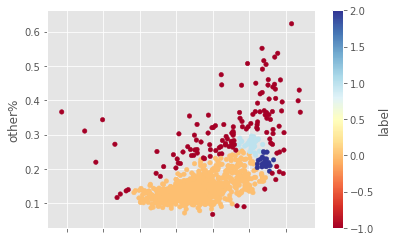

In [165]:
#c是图例 即按什么分类
london3_personal_wowo.plot.scatter(x='full time%',y='other%',c='label',cmap='RdYlBu')


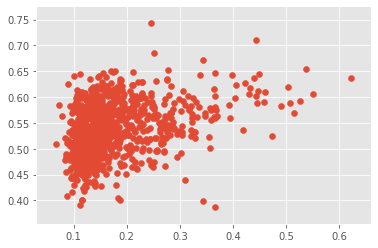

In [1543]:
plt.scatter(london3_personal_wowo[['other%']],london3_personal_wowo[['sex of males%']])

In [1540]:
london3_personal_wowo[['other%']]

other%
0                                     0.1247
1                                     0.1148
2                                     0.1442
3                                     0.1294
4                                     0.1299
5                                     0.1288
6                                     0.1118
7                                     0.1215
8                                     0.1309
9                                     0.1144
10                                    0.1278
11                                    0.1408
12                                    0.1408
13                                    0.1047
14                                    0.1217
15                                    0.1123
16                                    0.1363
17                                    0.1290
18                                    0.1390
19                                    0.1233
20                                    0.1143
21                                    0.1323
22                                    0.1619
23                                    0.1149
24                                    0.1036
25                                    0.1430
26                                    0.1071
27                                    0.1220
28                                    0.0995
29                                    0.1025
30                                    0.1081
31                                    0.1062
32                                    0.1245
33                                    0.1064
34                                    0.1020
35                                    0.1136
36                                    0.1147
37                                    0.1072
38                                    0.1554
39                                    0.1358
40                                    0.1402
41                                    0.1087
42                                    0.1123
43                                    0.1275
44                                    0.1177
45                                    0.1184
46                                    0.1013
47                                    0.1187
48                                    0.1387
49                                    0.1198
50                                    0.1222
51                                    0.1290
52                                    0.1300
53                                    0.1503
54                                    0.1241
55                                    0.1646
56                                    0.1266
57                                    0.1451
58                                    0.1783
59                                    0.1062
60                                    0.1617
61                                    0.1214
62                                    0.1296
63                                    0.0830
64                                    0.1005
65                                    0.1259
66                                    0.1315
67                                    0.1334
68                                    0.1222
69                                    0.1473
70                                    0.1415
71                                    0.1145
72                                    0.1438
73                                    0.1324
74                                    0.1299
75                                    0.1154
76                                    0.1472
77                                    0.1227
78                                    0.1478
79                                    0.1155
80                                    0.1322
81                                    0.1292
82                                    0.1418
83                                    0.1360
84                                    0.1143
85                                    0.1222
86                                    0.1241
87                                    0.1377
88                               

In [1539]:
london3_personal_wowo

other%  \
0                                     0.1247   
1                                     0.1148   
2                                     0.1442   
3                                     0.1294   
4                                     0.1299   
5                                     0.1288   
6                                     0.1118   
7                                     0.1215   
8                                     0.1309   
9                                     0.1144   
10                                    0.1278   
11                                    0.1408   
12                                    0.1408   
13                                    0.1047   
14                                    0.1217   
15                                    0.1123   
16                                    0.1363   
17                                    0.1290   
18                                    0.1390   
19                                    0.1233   
20                                    0.1143   
21                                    0.1323   
22                                    0.1619   
23                                    0.1149   
24                                    0.1036   
25                                    0.1430   
26                                    0.1071   
27                                    0.1220   
28                                    0.0995   
29                                    0.1025   
30                                    0.1081   
31                                    0.1062   
32                                    0.1245   
33                                    0.1064   
34                                    0.1020   
35                                    0.1136   
36                                    0.1147   
37                                    0.1072   
38                                    0.1554   
39                                    0.1358   
40                                    0.1402   
41                                    0.1087   
42                                    0.1123   
43                                    0.1275   
44                                    0.1177   
45                                    0.1184   
46                                    0.1013   
47                                    0.1187   
48                                    0.1387   
49                                    0.1198   
50                                    0.1222   
51                                    0.1290   
52                                    0.1300   
53                                    0.1503   
54                                    0.1241   
55                                    0.1646   
56                                    0.1266   
57                                    0.1451   
58                                    0.1783   
59                                    0.1062   
60                                    0.1617   
61                                    0.1214   
62                                    0.1296   
63                                    0.0830   
64                                    0.1005   
65                                    0.1259   
66                                    0.1315   
67                                    0.1334   
68                                    0.1222   
69                                    0.1473   
70                                    0.1415   
71                                    0.1145   
72                                    0.1438   
73                                    0.1324   
74                                    0.1299   
75                                    0.1154   
76                                    0.1472   
77                                    0.1227   
78                                    0.1478   
79                                    0.1155   
80                                    0.1322   
81                                    0.1292   
82                                    0.1418   
83    